In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Function for image loading

In [2]:
def load_data(path):
    print("Loading Data")
    D=[]
    L=[]
    image_path = os.listdir(path)
    #print(image_path)
    for file in image_path:
         #print(individual_image_path)
        each_image =Image.open(path+"/"+file)
        image_file=np.array(each_image,dtype='float64')
        image_file=image_file.flatten()
        D.append(image_file)
        #saving class label of each image
        if(file.split('.')[1]=='happy'):
            L.append(1)
        else:
            L.append(0)
    #changing list into numpy arrays       
    D=np.array(D)
    L=np.array(L)
    print("Data Loaded")
    #print(D.shape)
    return D,L

In [3]:
#data scaling and centering
# from sklearn.preprocessing import StandardScaler
# standardized_data = StandardScaler().fit_transform(D)

# Function for centering the data i,e Xn - mean

In [4]:
#centering data
def data_centering(X):
    D_mean = np.mean(X,axis=0)
    #print(D_mean)
    Cen_D = X-D_mean
    #print(D)
    return Cen_D

# Implementation of PCA

In [5]:
#PCA
def PCA_Higherdim(X,N,k):
    #N=10
    Cen_D=data_centering(X)
    covar =(Cen_D@Cen_D.T)/N
    #covar.shape
    #calculating eigen vectors of DDT
    from scipy.linalg import eigh

    #k=2
    #calculating top k eigen values and eigen vectors
    temp_evalues,temp_evectors = eigh(covar,eigvals=(N-k,N-1))

    #print(temp_evalues)
#     print(temp_evectors)
    
    root_Nlamda = 1/np.sqrt(np.multiply(temp_evalues,N))
    
# print(temp_evalues)
    
    e_vectors = Cen_D.T@temp_evectors

    #making diagonal matrix of 1/nlamd

    lamda_diag = np.diagflat(root_Nlamda)

    # print(lamda_diag.shape)
    # print(temp_evalues)
    # print(root_Nlamda)

    #print(e_vectors)

    final_evectors=e_vectors@lamda_diag
    return final_evectors

# Implementation of LDA

In [6]:
#LDA
def LDA(projected_data,k):
    m1=np.zeros(k)
    m2=np.zeros(k)
    # print(m1.shape)
    points_c1=0
    points_c2=0
    for i in range (L_train.size):
        if (L_train[i]==1):
            points_c1=points_c1+1
            m1=m1 + projected_data[i,]
        else:
            points_c2=points_c2+1
            m2=m2 + projected_data[i,]
    m1=m1/points_c1
    m2=m1/points_c2

    S_B=np.outer((m2-m1),(m2-m1))
    S_w0=np.zeros(k)
    S_w1=np.zeros(k)
    S_w0=np.outer(S_w0,S_w0)
    
#     print("data of S_B is",S_B)
    
    for i in range (L_train.size):
        if(L_train[i]==1):
            S_w0=S_w0+np.outer(projected_data[i,]-m1,projected_data[i,]-m1)
        else:
            S_w1=S_w1+np.outer(projected_data[i,]-m2,projected_data[i,]-m2)
           # S_w0=(1/points_c1)*S_w0
    
#     print(points_c1,points_c2)
    S_w0=S_w0/points_c1
    S_w1=S_w1/points_c2

    S_w=S_w0+S_w1
#     print("data of S_w is",S_w)
    
#     print("shape of S_W is",S_w.shape)
        
    Sw_inv = np.linalg.inv(S_w)
    from scipy.linalg import eigh
    evalues_LDA,evectors_LDA = eigh(Sw_inv@S_B,eigvals=(k-1,k-1))
#     print(evalues_LDA)
#     print(evectors_LDA)
    evectors_LDA=np.array(evectors_LDA)
    return evectors_LDA

# Loading Data Given and Apply PCA

In [7]:
#Loading code written
location1 = "/media/musa/New Volume/2.Semester II/3. MLSP/Assignments/1/Data/emotion_classification/train"
k=13
D_train,L_train=load_data(location1)
final_evectors_PCA=PCA_Higherdim(D_train,20,k)

#print(final_evectors_PCA)

#D_train.shape
projected_data = data_centering(D_train)@final_evectors_PCA

print("shape of projected data is ",projected_data.shape)
#projected_data
# print(D_train)
# print("______________________________________________")
# print(D_test)
# print("shape of D_train is ",D_train.shape)
# print("shape of D_test is ",D_test.shape)


Loading Data
Data Loaded
shape of projected data is  (20, 13)


# Displaying an image

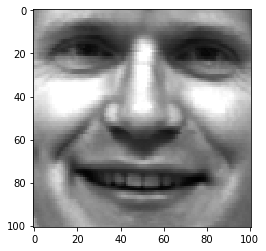

1


In [8]:

plt.figure(figsize=(4,4))
idx = 0
grid_data = D_train[idx].reshape(101,101)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(L_train[idx])

# Perform LDA

In [9]:
evectors_LDA= LDA(projected_data,k)

In [10]:
LDA_projected_data = projected_data@evectors_LDA

print("LDA projected data has shape",LDA_projected_data.shape)
LDA_projected_data = LDA_projected_data.reshape(-1)
print(LDA_projected_data)


LDA projected data has shape (20, 1)
[-1142.05199259  -935.93141969   480.47560461   706.89702733
    58.10644175   518.10790486   543.35006818  -810.15650764
   215.98125536 -1432.99711446   591.34509259  -929.99400378
  1293.99065739  -779.01917248   959.08123025   810.17377837
  -769.55823276   952.86877018  -661.08436182   330.41497435]


# Plot train data obtained from LDA

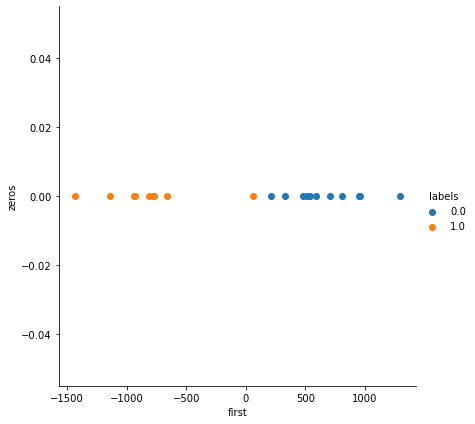

In [11]:

#on 2d lets plot it
# final_evectors_transposed.shape
#plotting data
import matplotlib.pyplot as plt
import pandas as pd


projected_data_withLabel = np.vstack((LDA_projected_data,np.zeros_like(LDA_projected_data),L_train)).T

# print(LDA_projected_data)
# print(projected_data_withLabel)

dataframe = pd.DataFrame(projected_data_withLabel, columns=["first","zeros","labels"])
#plotting data on 2 axis

import seaborn as sn
sn.FacetGrid(dataframe,hue="labels",height=6).map(plt.scatter,'first','zeros').add_legend()
plt.show()

# Loading Test set

In [12]:
location2 = "/media/musa/New Volume/2.Semester II/3. MLSP/Assignments/1/Data/emotion_classification/test"
D_test,L_test=load_data(location2)

Loading Data
Data Loaded


In [13]:
#test data centering and projecting
Cen_test_data = data_centering(D_test)

print("shape of Cen_test_data is ", Cen_test_data.shape)

#projected data using PCA eigen vectors

test_projected_data = Cen_test_data@final_evectors_PCA

LDA_test = test_projected_data@evectors_LDA
print("shape of LDA_test is ", LDA_test.shape)

shape of Cen_test_data is  (10, 10201)
shape of LDA_test is  (10, 1)


# Ploting test DATA


(10, 3)


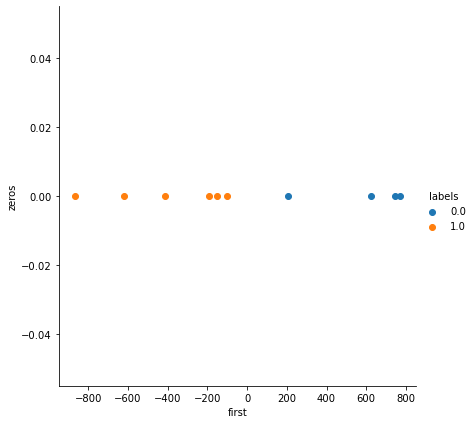

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

LDA_test = LDA_test.reshape(-1)
projected_data_withLabel_new = np.vstack((LDA_test,np.zeros_like(LDA_test),L_test)).T


print(projected_data_withLabel_new.shape)

dataframe = pd.DataFrame(projected_data_withLabel_new, columns=["first","zeros","labels"])
#plotting data on 2 axis

import seaborn as sn
sn.FacetGrid(dataframe,hue="labels",height=6).map(plt.scatter,'first','zeros').add_legend()
plt.show()

from the plot it is clear threshold is  0

I tried different values of K and at K=10 I got 100% accurate results as can be seen from the plot 

Here orange dots represent happy faces and blue dots represent sad faces

# seeing actual vs predicted

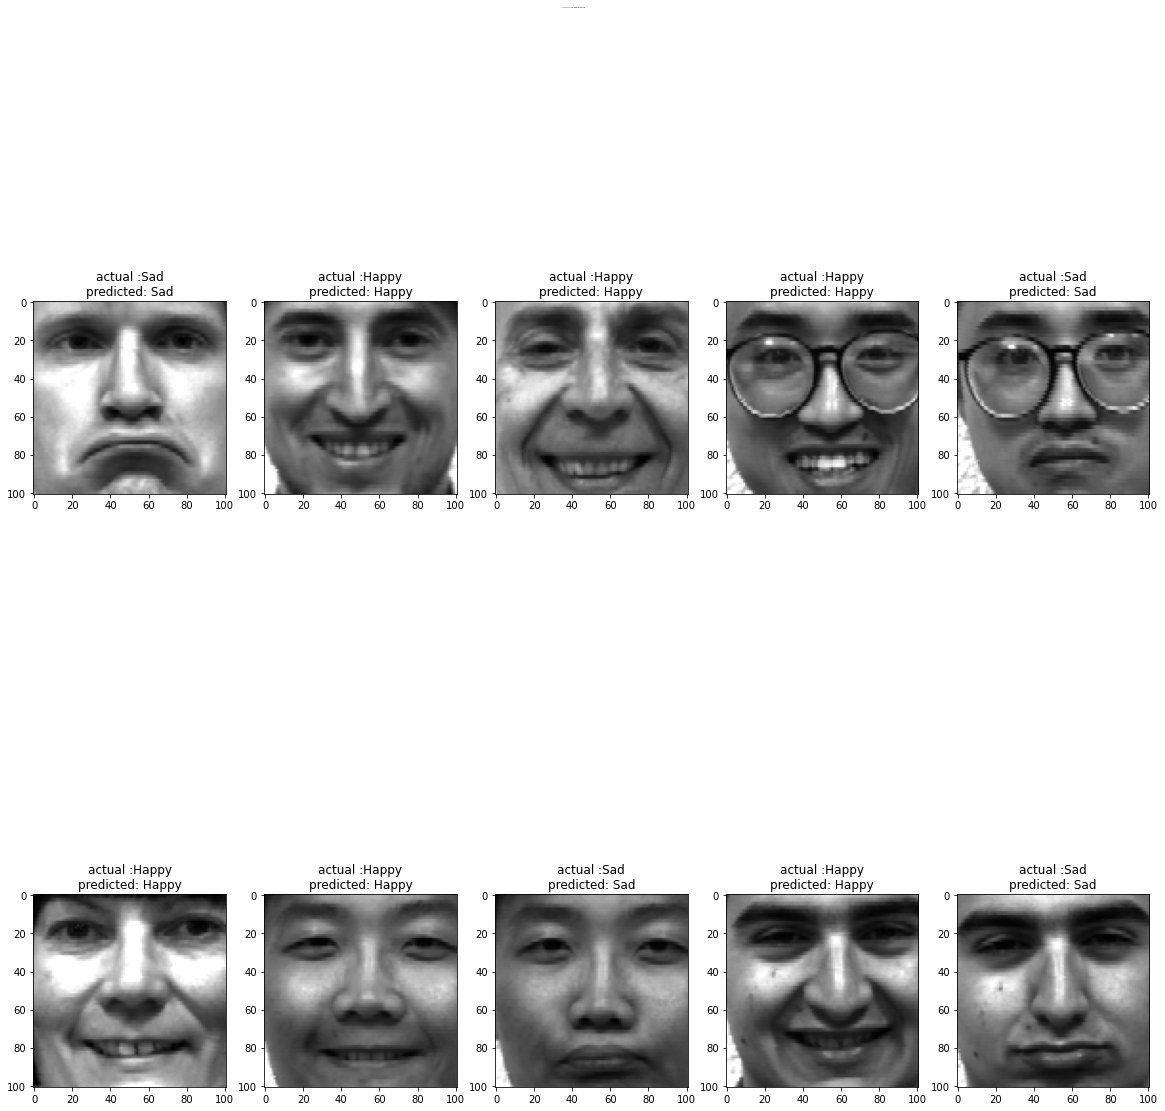

In [15]:
happy_sad=[]
for i in range(0,len(L_test)):
    if (L_test[i]==0):
        happy_sad.append("Sad")
    else:
        happy_sad.append("Happy")

fig=plt.figure(figsize=(20,20))
fig.suptitle("ACTUAL VS PREDICTED", fontsize=2)
for i in range(len(L_test)):
    plot=fig.add_subplot(2,5,i+1)
    plt.imshow(D_test[i,:].reshape(101,101),cmap='gray')
    if(LDA_test[i]>50):
        plot.set_title('actual :'+happy_sad[i]+'\npredicted: '+"Sad")
    else:
        plot.set_title('actual :'+happy_sad[i]+'\npredicted: '+"Happy")

# Report

We had train data set containg 20 points and dimension of each data point was 10201 i.e N <<< D

So, firstly we used PCA for higher dimension which was discussed in class. Implementation was done as explained in the class.

Dimensions were reduced from 10201 to 13 which was found to be optimal

Then LDA was implemented as discussed in class. Thereafter data was projected onto these 10 principle components which was given to PCA.

LDA took into consideration class seperation(supervised learning)

we reduced these 13 into just 1Dim by LDA and plotted them.

if k was less than 13 there were no good class seperation at K=13 and threshold =[50] we got 100% accuracy with a threshold value = 0


Below given is a table which gives threshold values of different k on which  classes get a good seperation on test data. 


above in the code I took threshold as 50 and k=13 to plot and test. Accuracy was 100%

Many of the value of K>8 were giving 100% on some threshold. when K<8 prediction was less accurate

| Value of K | Threshold Range where prediction is 100% Accurate |
| --- | --- |
| 10 | [-96.30657217, 355.28008348] |
| 11 | [-97.06979127, 348.13447568]|
| 12 | [-309.92734215, 195.0970597]|
| 13 | [-100.48268035, 206.73085617] |
| 14 | [-96.1561825, 206.67515385] |
| 15 | [-96.02994752, 207.01378023] |
| 16 | [-228.68004595, 93.63220774] |
| 17 | [-326.8537891, 93.59933721] |
| 18 | [-341.52168102, 5.30813019] |
| 19 | [-323.53608605, 9.33003604] |